In [1]:
#import
import os
import numpy as np
import pandas as pd
import re
import itertools
from collections import Counter
import pickle
import jieba
import matplotlib.pyplot as plt
import gensim
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim
from pprint import pprint

In [2]:
df_texts = pd.read_csv('df_texts_with_index.csv') #reading the dataframe with texts

In [3]:
with open('UsrWords.txt', 'r', encoding='utf8') as f:
    custom_noun = f.readlines()
    for noun in custom_noun:
        jieba.add_word(noun.replace('\n', ''), freq=None, tag='n')

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.562 seconds.
Prefix dict has been built successfully.


In [4]:
df_texts['words'] = df_texts.texts.apply(jieba.lcut)
df_texts.head()

,id,texts,words
0,1,个临时发往武汉的口罩\n个临时发往武汉的口罩个临时发往武汉的口罩个临时发往武汉的口罩吴呈杰报...,"[个, 临时, 发, 往, 武汉, 的, 口罩, \n, 个, 临时, 发, 往, 武汉, ..."
1,2,武汉隔离疫区信息孤岛与一辆鄂车的漂流\n武汉隔离疫区信息孤岛与一辆鄂车的漂流武汉隔离疫区信息...,"[武汉, 隔离, 疫区, 信息, 孤岛, 与, 一辆, 鄂车, 的, 漂流, \n, 武汉,..."
2,3,我家离华南海鲜市场很近返乡封城过年一位武汉大学生的过去一周\n我家离华南海鲜市场很近返乡封城...,"[我家, 离, 华南, 海鲜, 市场, 很近, 返乡, 封城, 过年, 一位, 武汉, 大学..."
3,4,疫情危机中不被看见的人们武汉周边城市百姓的自救行动\n疫情危机中不被看见的人们武汉周边城市百...,"[疫情, 危机, 中, 不, 被, 看见, 的, 人们, 武汉, 周边城市, 百姓, 的, ..."
4,5,孝感前线医生武汉更难我们下面不好意思提要求\n孝感前线医生武汉更难我们下面不好意思提要求孝感...,"[孝感, 前线, 医生, 武汉, 更难, 我们, 下面, 不好意思, 提, 要求, \n, ..."


In [15]:
df_texts

,id,texts,words
0,1,个临时发往武汉的口罩\n个临时发往武汉的口罩个临时发往武汉的口罩个临时发往武汉的口罩吴呈杰报...,"[临时, 发, 武汉, 口罩, 临时, 发, 武汉, 口罩, 临时, 发, 武汉, 口罩, ..."
1,2,武汉隔离疫区信息孤岛与一辆鄂车的漂流\n武汉隔离疫区信息孤岛与一辆鄂车的漂流武汉隔离疫区信息...,"[武汉, 隔离, 疫区, 信息, 孤岛, 一辆, 鄂车, 漂流, 武汉, 隔离, 疫区, 信..."
2,3,我家离华南海鲜市场很近返乡封城过年一位武汉大学生的过去一周\n我家离华南海鲜市场很近返乡封城...,"[我家, 华南, 海鲜, 市场, 很近, 返乡, 封城, 过年, 一位, 武汉, 大学生, ..."
3,4,疫情危机中不被看见的人们武汉周边城市百姓的自救行动\n疫情危机中不被看见的人们武汉周边城市百...,"[疫情, 危机, 看见, 武汉, 周边城市, 百姓, 自救, 行动, 疫情, 危机, 看见,..."
4,5,孝感前线医生武汉更难我们下面不好意思提要求\n孝感前线医生武汉更难我们下面不好意思提要求孝感...,"[孝感, 前线, 医生, 武汉, 更难, 下面, 不好意思, 提, 要求, 孝感, 前线, ..."
5,6,恐慌很正常当疫情结束才是心理问题高发期\n恐慌很正常当疫情结束才是心理问题高发期恐慌很正常当...,"[恐慌, 正常, 疫情, 结束, 心理, 问题, 高发期, 恐慌, 正常, 疫情, 结束, ..."
6,7,外卖骑手出租车司机快递员志愿者封城九日他们维护着武汉的血脉\n外卖骑手出租车司机快递员志愿者...,"[外卖, 骑手, 出租车, 司机, 快递, 员, 志愿者, 封城, 九日, 维护, 武汉, ..."
7,8,疫情中的心理援助寻找局部的安全\n疫情中的心理援助寻找局部的安全疫情中的心理援助寻找局部的安...,"[疫情, 心理, 援助, 寻找, 局部, 安全, 疫情, 心理, 援助, 寻找, 局部, 安..."
8,9,鸡在瘟疫蔓延时\n鸡在瘟疫蔓延时鸡在瘟疫蔓延时鸡在瘟疫蔓延时蔚琳颖迪呈杰敏洁报道报道记录人物...,"[鸡, 瘟疫, 蔓延, 鸡, 瘟疫, 蔓延, 时鸡, 瘟疫, 蔓延, 时鸡, 瘟疫, 蔓延,..."
9,10,武汉封城后的宠物营救计划人类犯错的后果不该由它们承担\n武汉封城后的宠物营救计划人类犯错的后...,"[武汉, 封城后, 宠物, 营救, 计划, 人类, 犯错, 后果, 不该, 承担, 武汉, ..."


In [5]:
fh = open("stopwords.txt")
stopwords=[]
stopwords.append('\n') #append the '\n' in the beginning otherwise it would be erased by strip
stopwords.append('%')  #we append some special characters, I am also goign to add it to the cleaning function pre-processing
stopwords.append('|')  #the texts but sometimes it does not catch them all
stopwords.append('△')
stopwords.append('▼')
stopwords.append('｜')
stopwords.append('\u3000') #this is a special empty space, I also removed tab space in the cleaning function, perhaps that'll help too
for line in fh:
    line = line.rstrip()
    stopwords.append(line)

def stp_removal(wordlist, stopwords=stopwords):
    lili=[]
    for word in wordlist:
        if word not in stopwords:
            lili.append(word)
    return lili

df_texts['words'] = df_texts.words.apply(stp_removal)
df_texts.head()

,id,texts,words
0,1,个临时发往武汉的口罩\n个临时发往武汉的口罩个临时发往武汉的口罩个临时发往武汉的口罩吴呈杰报...,"[临时, 发, 武汉, 口罩, 临时, 发, 武汉, 口罩, 临时, 发, 武汉, 口罩, ..."
1,2,武汉隔离疫区信息孤岛与一辆鄂车的漂流\n武汉隔离疫区信息孤岛与一辆鄂车的漂流武汉隔离疫区信息...,"[武汉, 隔离, 疫区, 信息, 孤岛, 一辆, 鄂车, 漂流, 武汉, 隔离, 疫区, 信..."
2,3,我家离华南海鲜市场很近返乡封城过年一位武汉大学生的过去一周\n我家离华南海鲜市场很近返乡封城...,"[我家, 华南, 海鲜, 市场, 很近, 返乡, 封城, 过年, 一位, 武汉, 大学生, ..."
3,4,疫情危机中不被看见的人们武汉周边城市百姓的自救行动\n疫情危机中不被看见的人们武汉周边城市百...,"[疫情, 危机, 看见, 武汉, 周边城市, 百姓, 自救, 行动, 疫情, 危机, 看见,..."
4,5,孝感前线医生武汉更难我们下面不好意思提要求\n孝感前线医生武汉更难我们下面不好意思提要求孝感...,"[孝感, 前线, 医生, 武汉, 更难, 下面, 不好意思, 提, 要求, 孝感, 前线, ..."


In [6]:
df_texts.columns

Index(['id', 'texts', 'words'], dtype='object')

In [11]:
import os
from gensim.models.wrappers import LdaMallet

os.environ.update({'MALLET_HOME':r'/home/bilatli/DEV/mallet-2.0.8/'}) 
#You should update this path as per the path of Mallet directory on your system.
mallet_path = r'/home/bilatli/DEV/mallet-2.0.8/bin/mallet' 
#You should update this path as per the path of Mallet directory on your system.

In [16]:
data_lemmatized = df_texts.words

id2word = gensim.corpora.Dictionary(data_lemmatized)

id2word.filter_extremes(no_above= 0.05) 

corpus = [id2word.doc2bow(doc) for doc in data_lemmatized]


In [17]:
def coherence_values_computation(dictionary, corpus, texts, limit, start=2, step=3):
   coherence_values = []
   model_list = []
   for num_topics in range(start, limit, step):
      model = gensim.models.wrappers.LdaMallet(
         mallet_path, corpus=corpus, num_topics=num_topics, iterations=1000, workers = 6, id2word=id2word
      )
      model_list.append(model)
      
      coherencemodel = CoherenceModel(
      model=model, texts=texts, dictionary=dictionary, coherence='c_v'
   )
      coherence_values.append(coherencemodel.get_coherence())
   return model_list, coherence_values

ValueError: x and y must have same first dimension, but have shapes (12,) and (15,)

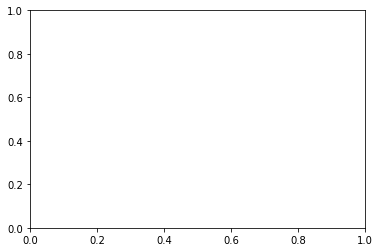

In [18]:
model_list, coherence_values = coherence_values_computation (
   dictionary=id2word, corpus=corpus, texts=data_lemmatized, 
   start=2, limit=45, step=3
)

limit=38; start=2; step=3;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

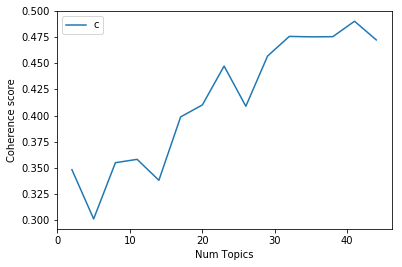

In [19]:
limit=45; start=2; step=3;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [20]:
for m, cv in zip(x, coherence_values):
   print("Num Topics =", m, " is having Coherence Value of", round(cv, 4))

Num Topics = 2  is having Coherence Value of 0.3482
Num Topics = 5  is having Coherence Value of 0.301
Num Topics = 8  is having Coherence Value of 0.3548
Num Topics = 11  is having Coherence Value of 0.358
Num Topics = 14  is having Coherence Value of 0.338
Num Topics = 17  is having Coherence Value of 0.3987
Num Topics = 20  is having Coherence Value of 0.4102
Num Topics = 23  is having Coherence Value of 0.4474
Num Topics = 26  is having Coherence Value of 0.4089
Num Topics = 29  is having Coherence Value of 0.457
Num Topics = 32  is having Coherence Value of 0.4758
Num Topics = 35  is having Coherence Value of 0.4754
Num Topics = 38  is having Coherence Value of 0.4756
Num Topics = 41  is having Coherence Value of 0.4903
Num Topics = 44  is having Coherence Value of 0.4724


In [21]:
optimal_model = model_list[9]

model = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(optimal_model)

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model, corpus, id2word)
vis


/home/bilatli/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:236: RuntimeWarning: divide by zero encountered in log
  log_1 = np.log(pd.eval("(topic_given_term.T / topic_proportion)"))
/home/bilatli/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:259: RuntimeWarning: divide by zero encountered in log
  log_lift = np.log(pd.eval("topic_term_dists / term_proportion")).astype("float64")
/home/bilatli/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:260: RuntimeWarning: divide by zero encountered in log
  log_ttd = np.log(topic_term_dists).astype("float64")


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
15     0.254868  0.076000       1        1  6.996654
26     0.222510  0.058428       2        1  5.356955
8      0.194417  0.023110       3        1  5.309523
17     0.185978  0.113952       4        1  5.299622
27     0.153812 -0.011545       5        1  4.688604
14     0.045473  0.036940       6        1  4.070784
5     -0.008587  0.034154       7        1  4.009225
22    -0.053650 -0.172649       8        1  3.907492
24    -0.009109 -0.172900       9        1  3.872800
12    -0.157376 -0.149211      10        1  3.851566
25    -0.101636 -0.100001      11        1  3.640423
7      0.143902  0.041489      12        1  3.247829
1     -0.034144  0.060551      13        1  3.220315
4      0.055164 -0.157260      14        1  3.143326
10    -0.159842  0.196658      15        1  3.101937
11    -0.103386 -0.113854      16        1  3.016723
21     0.071269  0.048360      17        1  2.882501
23     0.016676 -0.025572      18        1  2.822788
28     0.059318  0.051175      19        1  2.793556
2     -0.092328 -0.064260      20        1  2.769724
3     -0.069198 -0.113131      21        1  2.687421
19    -0.010134 -0.051379      22        1  2.637322
9     -0.094907  0.049667      23        1  2.596454
6      0.065925 -0.104961      24        1  2.543913
20    -0.100784 -0.026258      25        1  2.446883
13    -0.161725  0.138941      26        1  2.412594
16    -0.178179  0.192306      27        1  2.329284
18    -0.183952  0.168423      28        1  2.296159
0      0.049623 -0.027172      29        1  2.047624, topic_info=       Term         Freq        Total Category  logprob  loglift
22104    邮轮  1337.000000  1337.000000  Default  30.0000  30.0000
37799     昼  1439.000000  1439.000000  Default  29.0000  29.0000
3110   野生动物  1297.000000  1297.000000  Default  28.0000  28.0000
20247    监狱  1215.000000  1215.000000  Default  27.0000  27.0000
12860    公主   921.000000   921.000000  Default  26.0000  26.0000
4757     投诉   899.000000   899.000000  Default  25.0000  25.0000
12411  摄影记者   797.000000   797.000000  Default  24.0000  24.0000
23525    钻石   757.000000   757.000000  Default  23.0000  23.0000
38087    大邱   763.000000   763.000000  Default  22.0000  22.0000
7237     抗体   953.000000   953.000000  Default  21.0000  21.0000
18921    丁刚   747.000000   747.000000  Default  20.0000  20.0000
18231    温州   772.000000   772.000000  Default  19.0000  19.0000
12926    瑞德   725.000000   725.000000  Default  18.0000  18.0000
22403    泉州   866.000000   866.000000  Default  17.0000  17.0000
2575     村民   804.000000   804.000000  Default  16.0000  16.0000
10630    教会   684.000000   684.000000  Default  15.0000  15.0000
1248     奶奶  1036.000000  1036.000000  Default  14.0000  14.0000
4293     插管   744.000000   744.000000  Default  13.0000  13.0000
31461    血浆   749.000000   749.000000  Default  12.0000  12.0000
26493   奥运会   674.000000   674.000000  Default  11.0000  11.0000
12942    西韦   610.000000   610.000000  Default  10.0000  10.0000
23512    船上   567.000000   567.000000  Default   9.0000   9.0000
3282      猫   797.000000   797.000000  Default   8.0000   8.0000
31897   新天地   620.000000   620.000000  Default   7.0000   7.0000
2398     车队   669.000000   669.000000  Default   6.0000   6.0000
17054    航空   678.000000   678.000000  Default   5.0000   5.0000
2061     课程   612.000000   612.000000  Default   4.0000   4.0000
763      透析   651.000000   651.000000  Default   3.0000   3.0000
8505    熔喷布   560.000000   560.000000  Default   2.0000   2.0000
6090     屏蔽   519.000000   519.000000  Default   1.0000   1.0000
...     ...          ...          ...      ...      ...      ...
24550    甲板    51.322559    51.322559  Topic29  -6.4903   3.8885
24551    登船    50.253339    50.253339  Topic29  -6.5113   3.8885
24519    上船    49.184119    49.184119  Topic29  -6.5328   3.8885
24541    梦号    49.184119    49.184119  

In [22]:
vis

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
15     0.254868  0.076000       1        1  6.996654
26     0.222510  0.058428       2        1  5.356955
8      0.194417  0.023110       3        1  5.309523
17     0.185978  0.113952       4        1  5.299622
27     0.153812 -0.011545       5        1  4.688604
14     0.045473  0.036940       6        1  4.070784
5     -0.008587  0.034154       7        1  4.009225
22    -0.053650 -0.172649       8        1  3.907492
24    -0.009109 -0.172900       9        1  3.872800
12    -0.157376 -0.149211      10        1  3.851566
25    -0.101636 -0.100001      11        1  3.640423
7      0.143902  0.041489      12        1  3.247829
1     -0.034144  0.060551      13        1  3.220315
4      0.055164 -0.157260      14        1  3.143326
10    -0.159842  0.196658      15        1  3.101937
11    -0.103386 -0.113854      16        1  3.016723
21     0.071269  0.048360      17        1  2.882501
23     0.016676 -0.025572      18        1  2.822788
28     0.059318  0.051175      19        1  2.793556
2     -0.092328 -0.064260      20        1  2.769724
3     -0.069198 -0.113131      21        1  2.687421
19    -0.010134 -0.051379      22        1  2.637322
9     -0.094907  0.049667      23        1  2.596454
6      0.065925 -0.104961      24        1  2.543913
20    -0.100784 -0.026258      25        1  2.446883
13    -0.161725  0.138941      26        1  2.412594
16    -0.178179  0.192306      27        1  2.329284
18    -0.183952  0.168423      28        1  2.296159
0      0.049623 -0.027172      29        1  2.047624, topic_info=       Term         Freq        Total Category  logprob  loglift
22104    邮轮  1337.000000  1337.000000  Default  30.0000  30.0000
37799     昼  1439.000000  1439.000000  Default  29.0000  29.0000
3110   野生动物  1297.000000  1297.000000  Default  28.0000  28.0000
20247    监狱  1215.000000  1215.000000  Default  27.0000  27.0000
12860    公主   921.000000   921.000000  Default  26.0000  26.0000
4757     投诉   899.000000   899.000000  Default  25.0000  25.0000
12411  摄影记者   797.000000   797.000000  Default  24.0000  24.0000
23525    钻石   757.000000   757.000000  Default  23.0000  23.0000
38087    大邱   763.000000   763.000000  Default  22.0000  22.0000
7237     抗体   953.000000   953.000000  Default  21.0000  21.0000
18921    丁刚   747.000000   747.000000  Default  20.0000  20.0000
18231    温州   772.000000   772.000000  Default  19.0000  19.0000
12926    瑞德   725.000000   725.000000  Default  18.0000  18.0000
22403    泉州   866.000000   866.000000  Default  17.0000  17.0000
2575     村民   804.000000   804.000000  Default  16.0000  16.0000
10630    教会   684.000000   684.000000  Default  15.0000  15.0000
1248     奶奶  1036.000000  1036.000000  Default  14.0000  14.0000
4293     插管   744.000000   744.000000  Default  13.0000  13.0000
31461    血浆   749.000000   749.000000  Default  12.0000  12.0000
26493   奥运会   674.000000   674.000000  Default  11.0000  11.0000
12942    西韦   610.000000   610.000000  Default  10.0000  10.0000
23512    船上   567.000000   567.000000  Default   9.0000   9.0000
3282      猫   797.000000   797.000000  Default   8.0000   8.0000
31897   新天地   620.000000   620.000000  Default   7.0000   7.0000
2398     车队   669.000000   669.000000  Default   6.0000   6.0000
17054    航空   678.000000   678.000000  Default   5.0000   5.0000
2061     课程   612.000000   612.000000  Default   4.0000   4.0000
763      透析   651.000000   651.000000  Default   3.0000   3.0000
8505    熔喷布   560.000000   560.000000  Default   2.0000   2.0000
6090     屏蔽   519.000000   519.000000  Default   1.0000   1.0000
...     ...          ...          ...      ...      ...      ...
24550    甲板    51.322559    51.322559  Topic29  -6.4903   3.8885
24551    登船    50.253339    50.253339  Topic29  -6.5113   3.8885
24519    上船    49.184119    49.184119  Topic29  -6.5328   3.8885
24541    梦号    49.184119    49.184119  